In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/vk/wall.csv')

In [7]:
df.head()

,Unnamed: 0,post_id,date,likes,reposts,comments,text
0,0,698,1480407159,12,7,3,10 видеокурсов по основам менеджмента для руко...
1,1,728,1481363739,1,0,0,#куспеху@talentedme #прокрастинация #цитата\n\...
2,2,725,1481356051,11,4,2,[10 УРОКОВ ДЛЯ ВАШЕЙ КАРЬЕРЫ ]\nРаспечатайте и...
3,3,724,1481263024,6,3,0,[КАК ВЫЙТИ ИЗ ТВОРЧЕСКОГО КРИЗИСА?]\nСоветы от...
4,4,722,1481204686,6,1,0,Здесь вы найдете много мотивирующих цитат http...


In [10]:
import gensim
import nltk
from gensim.models.ldamulticore import LdaMulticore

In [12]:
from nltk.stem.snowball import RussianStemmer

tokenizer = nltk.tokenize.TreebankWordTokenizer()

stemmer = RussianStemmer()
tokens = tokenizer.tokenize('Карл у Клары украл кораллы, Клара у Карла уркала кларнет.')
tokens_stem = [stemmer.stem(token.lower()) for token in tokens]
print(tokens_stem)

['карл', 'у', 'клар', 'укра', 'коралл', ',', 'клар', 'у', 'карл', 'урка', 'кларнет', '.']


In [16]:
corpora = df.text.values

In [128]:
corpora[2]

'[10 УРОКОВ ДЛЯ ВАШЕЙ КАРЬЕРЫ ]\nРаспечатайте и\xa0повесьте на\xa0стену!\n\nЛегко смотреть на\xa0людей, у\xa0которых карьера идёт в\xa0гору соразмерно с\xa0зарплатой, и\xa0завистливо вздыхать. Сложнее остановиться и\xa0задуматься о\xa0том, что же пошло не\xa0так, и\xa0суметь вовремя это\xa0исправить. \n\n1. Жизнь коротка\n\nКак бы банально это\xa0ни\xa0звучало, но\xa0у\xa0вас всегда есть выбор. И\xa0свою короткую жизнь не\xa0стоит тратить на\xa0то, чтобы вкалывать на\xa0ненавистной работе или\xa0слушаться начальника‑самодура.\n\n2. Налаживайте связи\n\nВсе эти собрания, встречи, тимбилдинги и\xa0другие мероприятия, названные модными иностранными словечками, означают одно и\xa0то же. Вы должны провести какое‑то время вместе со\xa0своими коллегами, обсуждая работу или\xa0занимаясь общим делом. Несмотря на\xa0то что подобные мероприятия кажутся скучными или\xa0даже чужеродными, вам стоит уделять им больше внимания.\nМногие успешные люди имеют очень широкий круг общения. Чем больше времени

In [156]:
def keep_only_russian_chars(s):
    new_s = ''
    for c in s:
        if 'а' <= c <= 'я' or 'А' <= c <= 'Я':
            new_s += c
        else:
            new_s += ' '
    return new_s

In [157]:
keep_only_russian_chars('ты not пидор!')

'ты     пидор '

In [249]:
from nltk.corpus import stopwords

In [251]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [258]:
ru_stopwords = set(stopwords.words('russian'))

151

In [261]:
with open('data/stopwords/combined.txt') as f:
    for line in f:
        ru_stopwords.add(line.lower().strip())

In [262]:
len(ru_stopwords)

634

In [263]:
corpora_tokenzied = [tokenizer.tokenize((keep_only_russian_chars(str(doc).lower()))) for doc in corpora]
corpora_stemmed = []

for doc in corpora_tokenzied:
    stemmed_doc = [stemmer.stem(token) for token in doc if token not in ru_stopwords]
    stemmed_doc = [token for token in stemmed_doc if token not in ru_stopwords]
    corpora_stemmed.append(stemmed_doc)

In [264]:
for doc in corpora_stemmed[2:3]:
    print(doc)

['урок', 'карьер', 'распечата', 'повесьт', 'стен', 'легк', 'смотрет', 'люд', 'карьер', 'ид', 'гор', 'соразмерн', 'зарплат', 'завистлив', 'вздыха', 'сложн', 'останов', 'задума', 'пошл', 'сумет', 'воврем', 'исправ', 'коротк', 'банальн', 'звуча', 'выбор', 'коротк', 'трат', 'вкалыва', 'ненавистн', 'работ', 'слуша', 'начальник', 'самодур', 'налажива', 'связ', 'собран', 'встреч', 'тимбилдинг', 'мероприят', 'назва', 'модн', 'иностра', 'словечк', 'означа', 'одн', 'должн', 'провест', 'вмест', 'сво', 'коллег', 'обсужд', 'работ', 'заним', 'общ', 'несмотр', 'подобн', 'мероприят', 'кажут', 'скучн', 'чужеродн', 'уделя', 'вниман', 'мног', 'успешн', 'имеют', 'широк', 'круг', 'общен', 'удел', 'знаком', 'профессионал', 'успешн', 'жертв', 'здоров', 'рад', 'карьер', 'ощущен', 'драйв', 'работ', 'заставля', 'позаб', 'вс', 'пойма', 'волн', 'вдохновен', 'уделя', 'задач', 'невероятн', 'количеств', 'поведен', 'привод', 'выгоран', 'сер', 'зным', 'проблем', 'здоров', 'стресс', 'переутомлен', 'монитор', 'бумаг', '

In [265]:
dictionary = gensim.corpora.Dictionary(corpora_stemmed)

In [266]:
corpora_bow = [dictionary.doc2bow(doc) for doc in corpora_stemmed]

In [267]:
tfidf = gensim.models.TfidfModel(corpora_bow)
corpora_tfidf = tfidf[corpora_bow]

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
from collections import defaultdict

In [270]:
import numpy as np

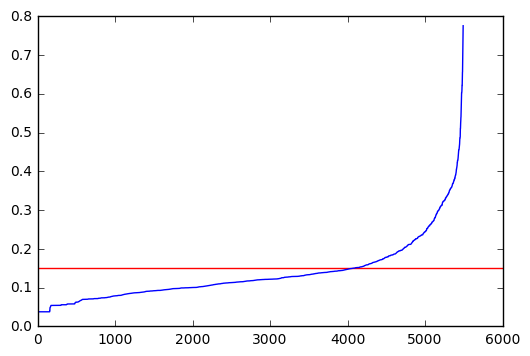

In [273]:
a = defaultdict(list)
for doc in corpora_tfidf:
    for i, p in doc:
        a[i].append(p)
a = [np.mean(s) for i, s in a.items()]
a.sort()
plt.plot(a)
plt.hlines(0.15, 0, 6000, 'r')

In [278]:
corpora_tfidf_truncated = [[it for it in doc if it[1] > 0.0] for doc in corpora_tfidf]

In [292]:
num_topics = 15

In [285]:
lda = LdaMulticore(num_topics=num_topics, corpus=corpora_bow, id2word=dictionary)

In [287]:
for doc in corpora_bow[2:3]:
    topics = sorted(lda[doc], key=lambda it: it[1], reverse=True)
    print(topics)
    for topic_id, p in topics:
        print('\t', topic_id, '=', lda.print_topic(topic_id))

[(2, 0.9585919930819401), (8, 0.038584982876044803)]
	 2 = 0.021*"работ" + 0.010*"карьер" + 0.008*"резюм" + 0.007*"курс" + 0.007*"развит" + 0.006*"коучинг" + 0.006*"успех" + 0.006*"мотивац" + 0.006*"бренд" + 0.005*"собеседован"
	 8 = 0.009*"совет" + 0.008*"работ" + 0.007*"прокачк" + 0.007*"карьер" + 0.007*"эффективн" + 0.006*"лидерств" + 0.006*"успех" + 0.005*"куспех" + 0.004*"нов" + 0.004*"цел"


In [288]:
lda.print_topics(num_topics)

[(0,
  '0.009*"работ" + 0.006*"успех" + 0.005*"курс" + 0.005*"книг" + 0.004*"бизнес" + 0.004*"компан" + 0.004*"лидер" + 0.004*"мотивац" + 0.004*"связ" + 0.004*"карьер"'),
 (1,
  '0.006*"решен" + 0.006*"юмор" + 0.005*"карьер" + 0.005*"важн" + 0.004*"резюм" + 0.004*"интуиц" + 0.004*"работ" + 0.004*"сервис" + 0.004*"школ" + 0.004*"дума"'),
 (2,
  '0.021*"работ" + 0.010*"карьер" + 0.008*"резюм" + 0.007*"курс" + 0.007*"развит" + 0.006*"коучинг" + 0.006*"успех" + 0.006*"мотивац" + 0.006*"бренд" + 0.005*"собеседован"'),
 (3,
  '0.007*"работ" + 0.006*"компан" + 0.006*"минут" + 0.006*"работа" + 0.004*"прокачк" + 0.004*"чита" + 0.004*"развит" + 0.004*"важн" + 0.003*"книг" + 0.003*"совет"'),
 (4,
  '0.013*"работ" + 0.006*"карьер" + 0.006*"успех" + 0.006*"цел" + 0.005*"люд" + 0.005*"задач" + 0.004*"курс" + 0.004*"решен" + 0.004*"сдела" + 0.004*"мотивац"'),
 (5,
  '0.015*"резюм" + 0.011*"компан" + 0.008*"работ" + 0.007*"курс" + 0.006*"прокачк" + 0.006*"решен" + 0.005*"виде" + 0.004*"работодател" + 

In [296]:
lda_posts_predf = []

for doc in corpora_bow:
    topics = lda[doc]
    row = [0] * num_topics
    for topic_id, p in topics:
        row[topic_id] = p
    lda_posts_predf.append(row)
    
lda_posts_df = pd.DataFrame(lda_posts_predf)
lda_posts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.989964,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.706624,0.000000,0.0,0.0,0.0,0.0,0.169567,0.0
2,0.0,0.0,0.958542,0.0,0.0,0.0,0.0,0.000000,0.038635,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.928205,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.896296,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [297]:
lda_posts_df.shape

(449, 15)

In [298]:
lda_posts_df.to_csv('data/vk/lda_posts.csv')

In [301]:
desc_of_group = pd.read_csv('data/vk/desc_of_group.csv').dropna()
desc_of_group.head()

,Unnamed: 0,group_id,description
2,2,44698558,Вот и весь СММ.
3,3,94575049,Самые полные курсы по таргетированной рекламе ...
4,4,87748076,Полезные видеозанятия по маркетингу и менеджме...
5,5,74954668,"Советы по улучшению работы, продвижению в карь..."
6,6,67977655,Newtonew — медиа-проект о современном образова...


In [302]:
descs = desc_of_group.description.values 

In [308]:
from tqdm import tqdm

In [ ]:
descs_tokenzied = [tokenizer.tokenize((keep_only_russian_chars(str(doc).lower()))) for doc in tqdm(descs)]





  0%|          | 0/252626 [00:00<?, ?it/s]



  0%|          | 280/252626 [00:00<01:30, 2799.11it/s]



  0%|          | 486/252626 [00:00<01:39, 2526.16it/s]



  0%|          | 715/252626 [00:00<01:42, 2450.04it/s]



  0%|          | 1058/252626 [00:00<01:33, 2679.01it/s]



  1%|          | 1348/252626 [00:00<01:31, 2740.70it/s]



  1%|          | 1584/252626 [00:00<01:36, 2613.05it/s]



  1%|          | 1889/252626 [00:00<01:31, 2728.49it/s]



  1%|          | 2145/252626 [00:00<01:35, 2621.87it/s]



  1%|          | 2396/252626 [00:00<01:38, 2529.34it/s]



  1%|          | 2720/252626 [00:01<01:32, 2706.03it/s]



  1%|          | 2989/252626 [00:01<01:52, 2219.52it/s]



  1%|▏         | 3225/252626 [00:01<02:05, 1981.40it/s]



  1%|▏         | 3449/252626 [00:01<02:01, 2051.84it/s]



  1%|▏         | 3665/252626 [00:01<02:02, 2040.56it/s]



  2%|▏         | 3920/252626 [00:01<01:54, 2167.61it/s]



  2%|▏         | 4185/252626 [00:01<01:48, 2290.77it/s]



  2%|▏   

In [ ]:
descs_stemmed = []
for doc in tqdm(descs_tokenzied):
    stemmed_doc = [stemmer.stem(token) for token in doc if token not in ru_stopwords]
    stemmed_doc = [token for token in stemmed_doc if token not in ru_stopwords]
    descs_stemmed.append(stemmed_doc)

In [323]:
descs_dictionary = gensim.corpora.Dictionary(descs_stemmed)
descs_bow = [descs_dictionary.doc2bow(doc) for doc in tqdm(descs_stemmed)]




  0%|          | 0/252626 [00:00<?, ?it/s]


  1%|          | 2837/252626 [00:00<00:08, 28359.68it/s]


  2%|▏         | 4588/252626 [00:00<00:10, 23912.55it/s]


  2%|▏         | 6180/252626 [00:00<00:11, 20779.55it/s]


  3%|▎         | 8407/252626 [00:00<00:11, 21203.28it/s]


  4%|▍         | 9959/252626 [00:00<00:13, 18009.19it/s]


  5%|▍         | 11506/252626 [00:00<00:14, 17158.70it/s]


  5%|▌         | 13010/252626 [00:00<00:14, 16085.98it/s]


  6%|▌         | 14692/252626 [00:00<00:14, 16295.27it/s]


  6%|▋         | 16228/252626 [00:00<00:15, 15262.90it/s]


  7%|▋         | 18020/252626 [00:01<00:14, 15972.82it/s]


  8%|▊         | 19823/252626 [00:01<00:14, 16536.70it/s]


  9%|▊         | 21558/252626 [00:01<00:13, 16772.39it/s]


  9%|▉         | 23226/252626 [00:01<00:14, 16057.25it/s]


 10%|▉         | 25017/252626 [00:01<00:13, 16562.74it/s]


 11%|█         | 26678/252626 [00:01<00:15, 14322.37it/s]


 11%|█         | 28167/252626 [00:01<00:15, 14103.54it/s]

In [324]:
descs_lda = LdaMulticore(num_topics=num_topics, corpus=descs_bow, id2word=descs_dictionary)

In [325]:
descs_lda_posts_predf = []

for doc in tqdm(descs_bow):
    topics = descs_lda[doc]
    row = [0] * num_topics
    for topic_id, p in topics:
        row[topic_id] = p
    descs_lda_posts_predf.append(row)
    
descs_lda_posts_df = pd.DataFrame(descs_lda_posts_predf)
descs_lda_posts_df.head()

100%|██████████| 252626/252626 [39:22<00:00, 106.93it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.033333,0.033333,0.033333,0.533333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
1,0.000000,0.190038,0.000000,0.784472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.906667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.883333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.221366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.755210,0.000000,0.000000,0.000000


In [331]:
descs_lda_groups_predf = descs_lda_posts_predf

In [334]:
for i, row in tqdm(enumerate(descs_lda_groups_predf)):
    descs_lda_groups_predf[i] = desc_of_group.iloc[i].group_id + row

252626it [00:44, 5623.38it/s]


In [335]:
len(descs_lda_posts_predf)

252626

In [336]:
descs_lda_groups_df = pd.DataFrame(descs_lda_groups_predf)
descs_lda_groups_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07,8.939712e+07
1,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08,1.891501e+08
2,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08,1.754962e+08
3,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08,1.499093e+08
4,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08,1.359553e+08


In [333]:
descs_lda_groups_df.to_csv('data/vk/descs_lda_groups_df.csv')

NameError: name 'descs_lda_groups_df' is not defined